In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Data for off-line RL

#### Normalized state features for the current RL agent.

+ state_dm_before_linear: command at t-1
+ state_dm_history_0: command at t-2
+ state_dm_history_1: command at t-3
+ state_wfs: wavefront sensor measurement at t

#### Unnormalized state features.
+ wfs: wavefront sensor measurment at t
+ btt_modes: commands in modal space at t

#### Two possible rewards.
+ reward_list_measurements: avg(m^2), where m is the measurement centroid of each subaperture
+ rewards_list_phase: minus the residual wavefront phase variance

#### Information:
+ All of the have the shape timestep x features

In [3]:
# State as seen by the RL agent
state_dm_before_linear = np.load("data/state_dm_before_linear.npy")
state_dm_history_0 = np.load("data/state_dm_history_0.npy")
state_dm_history_1 = np.load("data/state_dm_history_1.npy")
state_wfs = np.load("data/state_wfs.npy")

# "Real" state
wfs = np.load("data/wfs.npy")
btt_modes = np.load("data/btt_modes.npy")

# Two possible rewards 
# a) very informative reward but not possible in real life 
# b) current reward we are using for possible real life implementation
reward_list_measurements = np.load("data/reward_list_measurements.npy")
reward_list_phase = np.load("data/reward_list_phase.npy")


In [4]:
# Shape of each is timestep x feature
print(state_dm_before_linear.shape)
print(state_dm_history_0.shape)
print(state_dm_history_1.shape)
print(state_wfs.shape)

print(wfs.shape)
print(btt_modes.shape)

print(reward_list_measurements.shape)
print(reward_list_phase.shape)


(2000, 87)
(2000, 87)
(2000, 87)
(2000, 128)
(2000, 128)
(2000, 87)
(2000,)
(2000,)


In [5]:
print("Mean/Var/Max/Min")
print(round(state_dm_before_linear.mean(), 4), round(state_dm_before_linear.var(),4), round(state_dm_before_linear.max(),4), round(state_dm_before_linear.min(),4))
print(round(state_dm_history_0.mean(),4), round(state_dm_history_0.var(),4), round(state_dm_history_0.max(),4), round(state_dm_history_0.min(),4))
print(round(state_dm_history_1.mean(),4), round(state_dm_history_1.var(),4), round(state_dm_history_1.max(),4), round(state_dm_history_1.min(),4))
print(round(state_wfs.mean(),6), round(state_wfs.var(),4), round(state_wfs.max(),4), round(state_wfs.min(),4))

print(round(wfs.mean(),6), round(wfs.var(),4), round(wfs.max(),4), round(wfs.min(),4))
print(round(btt_modes.mean(),4), round(btt_modes.var(),4), round(btt_modes.max(),4), round(btt_modes.min(),4))

print(round(reward_list_measurements.mean(),4), round(reward_list_measurements.var(), 6), round(reward_list_measurements.max(),4), round(reward_list_measurements.min(),4))
print(round(reward_list_phase.mean(),4), round(reward_list_phase.var(), 4), round(reward_list_phase.max(),4), round(reward_list_phase.min(),4))

Mean/Var/Max/Min
0.0399 0.9956 4.3216 -4.1094
0.0399 0.9946 4.3216 -4.1094
0.0399 0.9936 4.3216 -4.1094
0.000408 1.0008 5.261 -4.9874
8e-06 0.01 0.5717 -0.5718
0.0029 0.0047 0.9176 -0.8545
-0.01 7e-06 -0.0044 -0.0445
0.1501 0.0205 3.7627 0.0688


Text(0, 0.5, 'Value')

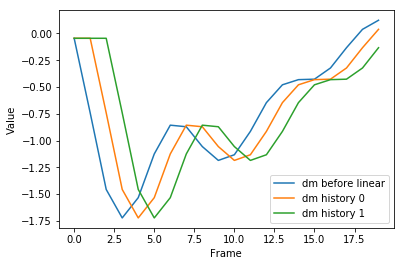

In [6]:
plt.plot(state_dm_before_linear[:20, 0], label="dm before linear")
plt.plot(state_dm_history_0[:20, 0], label="dm history 0")
plt.plot(state_dm_history_1[:20, 0], label="dm history 1")
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

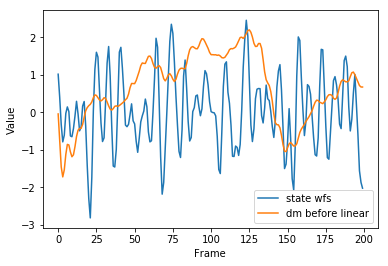

In [7]:
plt.plot(state_wfs[:200, 0], label="state wfs")
plt.plot(state_dm_before_linear[:200, 0], label="dm before linear")
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Value")

Text(0, 0.5, 'Reward')

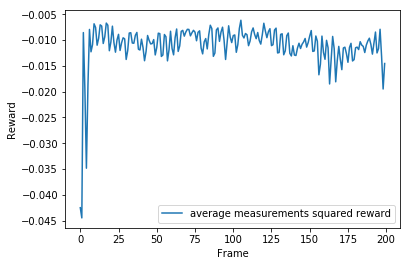

In [8]:
plt.plot(reward_list_measurements[:200], label="average measurements squared reward")
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Reward")

Text(0, 0.5, 'Reward')

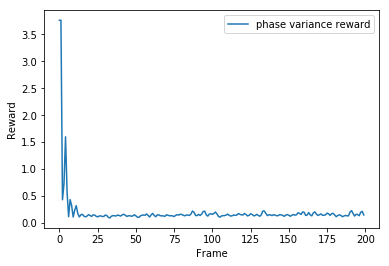

In [9]:
plt.plot(reward_list_phase[:200], label="phase variance reward")
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Reward")

Text(0, 0.5, 'Value')

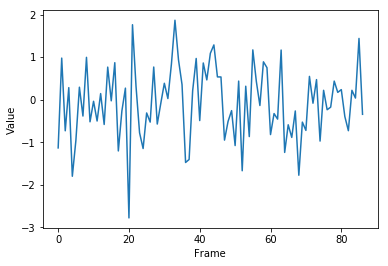

In [10]:
plt.plot(state_dm_before_linear[10, :], label="Modes normalized")
plt.xlabel("Frame")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

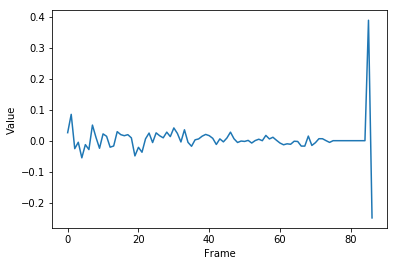

In [11]:
plt.plot(btt_modes[20, :], label="Modes unnormalized")
plt.xlabel("Frame")
plt.ylabel("Value")

# SAC Model

In [16]:
from rl_model.sac import SAC